## corv: A Tutorial

[GitHub Page](https://github.com/vedantchandra/corv) | [Fitting A DA White Dwarf Without Templates](#da-no-template)

---

The role of this notebook is to present $\texttt{corv}$. $\texttt{corv}$ determines radial velocities using two methods. First,  

<a id="linkhandle"></a>

**01. Fitting A DA White Dwarf Without Templates (Need to check/proofread)**

---

The following is an example using $\texttt{corv}$ to calculate radial velocities of DA white dwarfs. It does this by isolating a portion of the spectrum around each absorption line. Then, $\texttt{corv}$ generates a model. When fitting without templates, that model consists of the control parameters of each Voigt profile plus a parameter for radial velocity. Then, $\texttt{corv}$ fits each parameter.

In [1]:
import corv
from astroquery.sdss import SDSS
import matplotlib.pyplot as plt

could not find pickled WD models
/Users/vedantchandra/0_research/01_sdss5/006_build_corv/data/comm_cat/
star and exposure catalogs not found! check paths and run make_catalogs() if you want to use sdss functionality. otherwise ignore.


In [2]:
plate = 3650
mjd = 55244
fiberid = 485

spec = SDSS.get_spectra_async(plate=plate, fiberID=fiberid, mjd=mjd)[0].get_fits()

In [3]:
wl = 10**spec[1].data['loglam']
fl = spec[1].data['flux']
ivar = spec[1].data['ivar']

Text(0.5, 1.0, 'White Dwarf Spectrum')

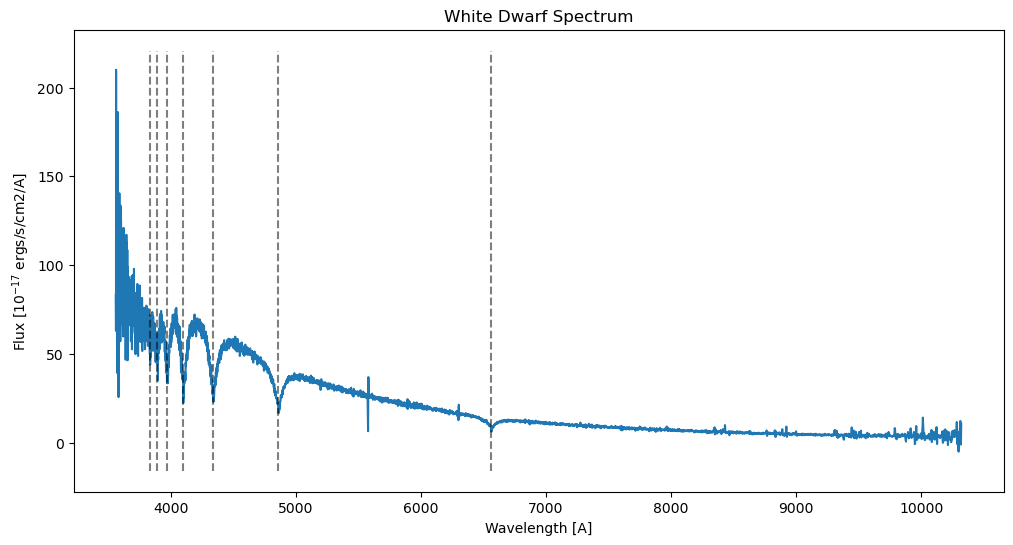

In [4]:
balmer_lines = [6562.79, 4861.35, 4340.47, 4101.73, 3970.07, 3889.06, 3835.40]

plt.figure(figsize=(12,6))

plt.plot(wl, fl)
min_, max_ = plt.ylim()
plt.vlines(balmer_lines, min_, max_, colors = 'black', linestyle = 'dashed', alpha = 0.5)
plt.ylabel(r'Flux [$10^{-17}$ ergs/s/cm2/A]')
plt.xlabel(r'Wavelength [A]')
plt.title('White Dwarf Spectrum')

In [5]:
corvmodel = corv.models.make_balmer_model(names = ['a','b','g','d'])

param_res, rv_res, rv_init = corv.fit.fit_corv(wl, fl, ivar, corvmodel)

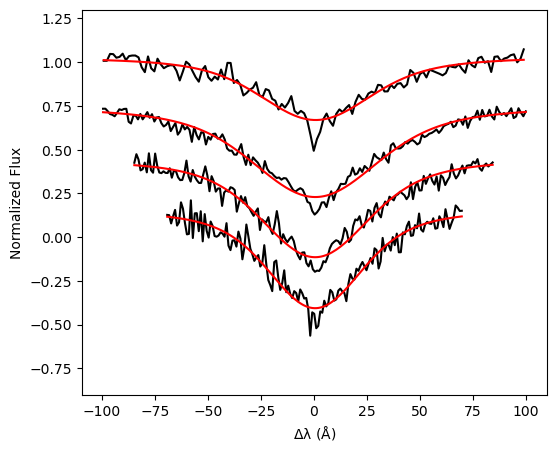

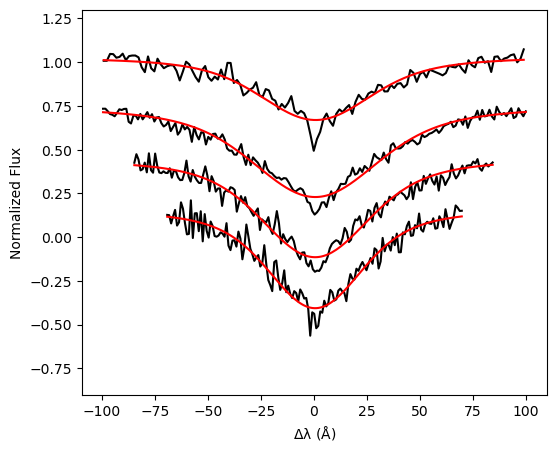

In [6]:
corv.utils.lineplot(wl, fl, ivar, corvmodel, rv_res.params, gap = 0.3, printparams = False, figsize = (6, 5))

In [9]:
rv_res.params['RV']

<Parameter 'RV', value=36.75733261356663, bounds=[-2500:2500]>